In [1]:
import os
import pandas as pd
import numpy as np 
import pingouin as pg 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
def get_data_dir(data_name : str) :
    curr_dir = os.getcwd()
    data_dir = curr_dir + "/" + data_name

    return data_dir

def get_data_dict( data_name ) :
    data_dir = get_data_dir(data_name)
    parti_list = os.listdir(data_dir)
    parti_list = [ x for x in parti_list if not x.startswith(".")]
    parti_dict = { x.split(sep='.')[0] : np.load(data_dir + "/" + x) if x.endswith(".npy") \
                  else pd.read_csv(data_dir + "/" + x, index_col=0 ).values for x in parti_list}

    return parti_dict

def dict_sort( data_dict ) : 
    sorted_dict = dict(sorted(data_dict.items()))

    return sorted_dict

def key_str2int( data_dict ) : 
    data_dict = { int(key.split(sep='_')[0]) : value for key, value in data_dict.items() }

    return data_dict
    

def get_data_arr( data_dict) :
    
    data_dict = dict_sort(data_dict)

    arr = [ value for key, value in data_dict.items() ]

    arr = np.array(arr)

    return arr

 
items = ['Bleary' , 'Dry Eyed' , 'Eyestrain', 'Gritty', 'Eye-Ache', 'Sting', \
        'Heavy Eyes', 'Hazy', 'Warm Eyes', 'Flickering', 'Watery Eyes', 'Feeling heavy in the head', 'Feel heavy', \
        'Difficulty concentrating', 'Dizzy', 'Stiff shoulder', 'Stiff neck', 'Sleepy', 'Vomiiting', 'Vertigo', 'Nausea', \
        'Difficulty focussing', 'Double vision', 'Near vision difficulty', \
        'Far vision difficulty', 'Pain in the temple', 'Pain in the middle of the head', 'Pain in the back of the head' ]

In [3]:
ssq_dict = get_data_dict('SSQ')
ssq_arr = get_data_arr(ssq_dict)



print("-"*11 + "Sorted" + "-"*11 )
print(ssq_dict[next(iter(ssq_dict.keys()))].shape)
print(ssq_arr.shape)


-----------Sorted-----------
(28, 5)
(52, 28, 5)


In [4]:
ssq_arr = ssq_arr.transpose(1,0,2)

print("-"*11 + "Sorted" + "-"*11 )
print(ssq_arr.shape)


-----------Sorted-----------
(28, 52, 5)


In [5]:
for ind, value in enumerate(ssq_arr):
    data = ssq_arr[ind][:,1:].flatten()
    blocks = [ "HMHB", "HMLB", "LMHB", "LMLB"] * ssq_arr.shape[1]
    names = np.repeat(np.arange(ssq_arr.shape[1]),4)

    df = pd.DataFrame( { 'names' : names, 'rating' : data, 'blocks': blocks})
    results = pg.rm_anova( data= df, dv='rating', within='blocks', subject='names', correction=True)

    if results['p-unc'].values <= 0.05  :
        post_hoc = pg.pairwise_tests(data= df, dv='rating', within='blocks', subject='names', padjust='bonf')
        print(items[ind])
        print(results['F'].values, results['p-unc'].values)
        print("-"*100,'\n')
        print(post_hoc[["A", "B", "T","p-unc"]].round(3))
        print("="*100,'\n')

Dizzy
[3.83959044] [0.01098357]
---------------------------------------------------------------------------------------------------- 

      A     B      T  p-unc
0  HMHB  HMLB  2.262  0.028
1  HMHB  LMHB  2.638  0.011
2  HMHB  LMLB  2.956  0.005
3  HMLB  LMHB  0.960  0.342
4  HMLB  LMLB  0.655  0.516
5  LMHB  LMLB -0.188  0.851

Vertigo
[2.73112983] [0.0458583]
---------------------------------------------------------------------------------------------------- 

      A     B      T  p-unc
0  HMHB  HMLB  1.089  0.281
1  HMHB  LMHB  2.479  0.017
2  HMHB  LMLB  1.974  0.054
3  HMLB  LMHB  1.586  0.119
4  HMLB  LMLB  0.984  0.330
5  LMHB  LMLB -0.820  0.416

Nausea
[3.95748436] [0.00943188]
---------------------------------------------------------------------------------------------------- 

      A     B      T  p-unc
0  HMHB  HMLB  1.979  0.053
1  HMHB  LMHB  2.232  0.030
2  HMHB  LMLB  4.205  0.000
3  HMLB  LMHB  0.348  0.729
4  HMLB  LMLB  1.386  0.172
5  LMHB  LMLB  0.873  0.387

Di

In [6]:
data = ssq_arr.mean(axis=0)[:,1:].flatten()
blocks = [ "HMHB", "HMLB", "LMHB", "LMLB"] * ssq_arr.shape[1]
names = np.repeat(np.arange(ssq_arr.shape[1]),4)

df = pd.DataFrame( { 'names' : names, 'rating' : data, 'blocks': blocks})
results = pg.rm_anova( data= df, dv='rating', within='blocks', subject='names', correction=True)

post_hoc = pg.pairwise_tests(data= df, dv='rating', within='blocks', subject='names', padjust='bonf')
print("AVG_SSQ")
print(results['F'].values, results['p-unc'].values)
print("-"*100,'\n')
print(post_hoc[["A", "B", "p-unc"]])
print("="*100,'\n')

AVG_SSQ
[1.81812224] [0.14619522]
---------------------------------------------------------------------------------------------------- 

      A     B     p-unc
0  HMHB  HMLB  0.079104
1  HMHB  LMHB  0.058432
2  HMHB  LMLB  0.033112
3  HMLB  LMHB  0.713083
4  HMLB  LMLB  0.719171
5  LMHB  LMLB  0.950616



In [7]:
def singnificantLine(ax, x1, x2, y, text, font_size = 25, family_ = 'Times New Roman', weight_ ='bold' ):
    ax.hlines(y, x1, x2, colors='gray', linestyles='solid')
    ax.text( x1+x2/2, y, text, fontsize = font_size, family = family_, weight=weight_)

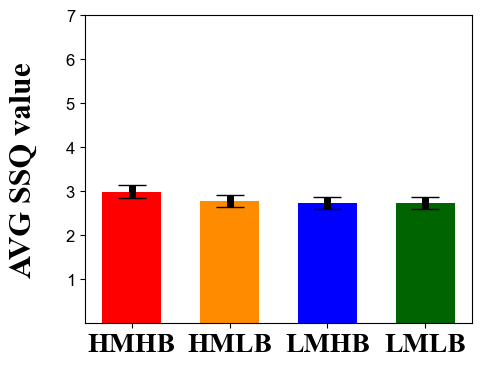

In [8]:
avg_ssq = ssq_arr.mean(axis=0)[:,1:].T

se_ssq = [np.std(avg_ssq[ind]) / np.sqrt(52) for ind in range(len(avg_ssq))]

fig = plt.figure(figsize=(5,4))

colors = ['r', 'darkorange', 'b', 'darkgreen']
block_names = ['HMHB','HMLB','LMHB','LMLB']
font_dict = {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'bold',
      'size': 15,
      'va' : 'center',
      'ha' : 'center' }

plt.bar(range(4), avg_ssq.mean(axis=1), color = colors , width=0.6)
plt.xticks(range(4), block_names , fontsize = 20, family = "Times New Roman", weight='bold' );
plt.ylabel("AVG SSQ value", fontsize = 23,family = "Times New Roman", weight='bold' , labelpad = 20 );
plt.yticks(range(1,8), range(1,8), fontsize=12, family ='Arial')
plt.ylim(0,7)
plt.errorbar(range(4), avg_ssq.mean(axis=1),yerr = se_ssq, linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 
#plt.text(-0.2,6.3,'(a)', ha ='center', fontsize = 20, family = 'Arial', weight='bold' ); 

# for i, blc in enumerate(avg_ssq.mean(axis=1)): 
#     plt.text(x = i, y= avg_ssq.mean(axis=1)[i] + 0.5, s= round(blc, 2), fontdict=font_dict, color='black')

In [9]:
np.save( os.getcwd() + "/AVG/SSQ.npy", ssq_arr)